In [68]:
# Calculating stock weights for Emilly & Ed's personal portfolio

import numpy as np
import pandas as pd
import IPython.display 

#!pip install pandas_datareader
import pandas_datareader
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [69]:
# Collecting data from the start of Black Thursday, the 2020 COVID-19 market crash.

%matplotlib inline

# round1 = ['SBE', '^GSPC', 'VGT', 'XLK', 'IWL', 'IVV', 'GSLC', 'BLK', 'VOO', 'SPY', 'SPGM', 'MSFT', 'XLG', 'QQQE',
#          'NVDA', 'NDAQ', 'BABA', 'SPYG', 'GOOGL', 'TAN', 'QCLN', 'PBW', 'TSLA', 'XPEV', 'LI', 'NIU', 'BYDDY',
#          'ENPH', 'CSIQ', 'FSLR', 'PLUG', 'NOVA', 'SPWR', 'JD', 'ZM', 'ZG', 'PYPL', 'SQ','FVRR', 'PINS', 'SHOP', 
#           'CRWD', 'NET', 'NOW', 'TTD', 'ETSY', 'CRSP', 'AMD', 'TSM', 'CRSR', 'APPN', 'ROKU', 'SPCE', 
#           'MRNA', 'IWM', 'QQQ', 'FNGU','RSP', 'VWDRY', 'COST', 'DIA']

# Round 2: This portfolio is broken down in the following way - popular/general equities, tech, consumer goods,
# clean energy, real estate, commodities, banking, business, healthcare, food & drink, automotive, software. Please note
# berkshire equities cause issues...

assets = ['BLK', 'IWL', 'VONE', 'NDAQ', 'VOO', 'DIA', 'VYM', 'EH', 'ARKK', 'MSCI', 'MSFT', 'AMZN', 'NFLX', 'GOOGL', 'COST',
        'EEM', 'IEMG', 'NVDA', 'SPY', 'SPYG', 'V', 'VGT', 'XLK', 'TSLA', 'TGT', 'CRM', 'RNG', 'XRT', 'TSM', 'QCOM', 'TEAM',
          'HD', 'NKE', 'ABT', 'LOW', 'ROKU', 'HTHIY', 'MITSY', 'RUN', 'PLD', 'DRE', 'BXMT', 'FAAR', 'CCRV', 'USCI',
         'HSY', 'SAM', 'NOW', 'SPGI', 'WDAY', 'Z', 'ETSY', 'TWLO', 'APPN', 'IVV', 'XLG', 'QQQ', 'SPGM',
         'FTGC', 'BAC', 'INFY', 'USB', 'MCO', 'U', 'EXPGY', 'WLTW', 'TRU', 'MORN', 'JNJ', 'UNH', 'RHHBY', 'ZTS']
# NIO, FVRR

pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2020-3-12')['Adj Close']

<AxesSubplot:xlabel='Date'>

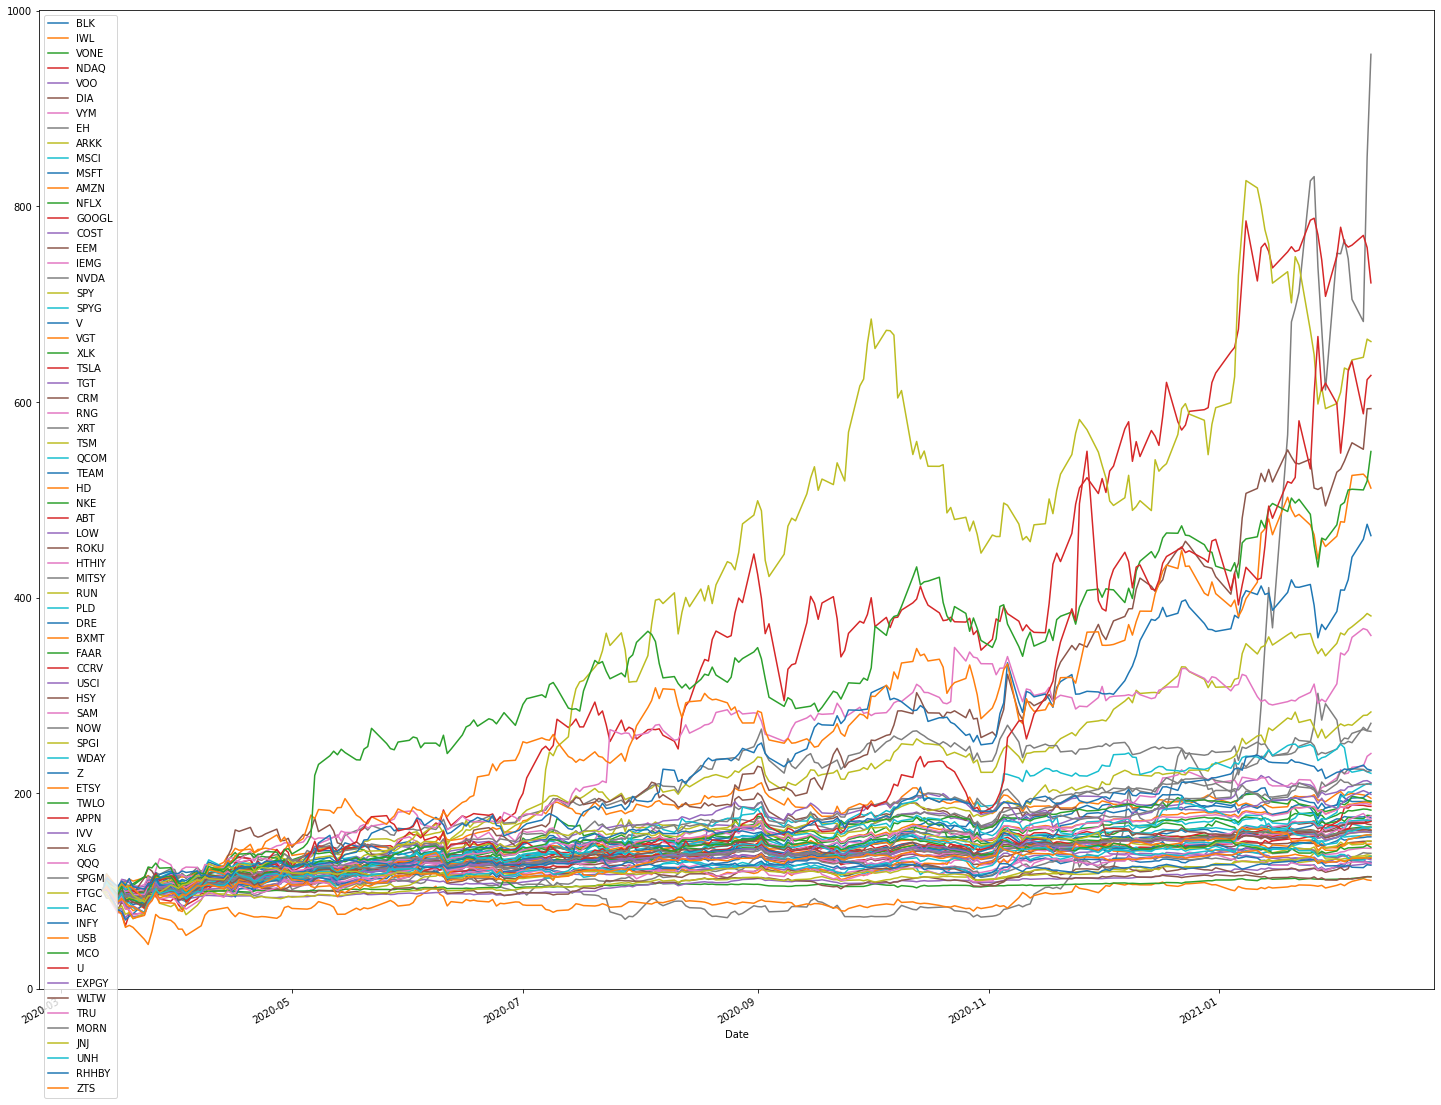

In [73]:
# Normalize data such that each stock price starts at $100

(pf_data / pf_data.iloc[0] * 100).plot(figsize = (25, 20))

In [22]:
pf_data.tail()

,BLK,IWL,VONE,NDAQ,VOO,DIA,VYM,EH,ARKK,MSCI,...,MCO,U,EXPGY,WLTW,TRU,MORN,JNJ,UNH,RHHBY,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-04,732.450012,93.199997,181.550003,143.570007,355.019989,310.670013,94.150002,80.910004,148.350006,430.190002,...,276.850006,149.809998,37.230000,209.300003,93.139999,241.009995,161.990005,329.320007,43.700001,157.130005
2021-02-05,726.330017,93.570000,182.479996,142.589996,356.440002,311.540009,94.529999,76.400002,149.460007,429.809998,...,276.970001,128.639999,36.500000,223.910004,93.589996,237.350006,164.449997,324.510010,42.959999,159.279999
2021-02-08,726.450012,94.199997,183.809998,142.449997,359.070007,313.890015,95.410004,73.940002,153.309998,422.730011,...,278.390015,124.889999,36.099998,225.699997,93.639999,238.809998,164.919998,324.339996,42.820000,160.020004
2021-02-09,728.799988,94.139999,183.869995,143.130005,358.779999,313.920013,95.360001,92.129997,154.929993,417.970001,...,282.320007,128.000000,35.060001,228.490005,93.510002,238.779999,166.270004,329.630005,43.849998,159.830002
2021-02-10,726.765015,93.877296,183.600006,141.580002,358.019989,313.797913,95.294998,104.250000,154.220001,411.510010,...,277.260010,128.199905,35.208000,226.970001,92.195000,240.050003,166.179993,333.339996,43.580002,160.770004


In [23]:
pf_data.head()

,BLK,IWL,VONE,NDAQ,VOO,DIA,VYM,EH,ARKK,MSCI,...,MCO,U,EXPGY,WLTW,TRU,MORN,JNJ,UNH,RHHBY,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-12,379.442535,57.766876,111.124908,87.600258,223.438675,208.177933,66.322327,10.84,40.383888,255.104523,...,192.151489,NaN,27.231005,170.347900,72.296021,114.202026,122.869385,246.355637,34.585171,119.582413
2020-03-13,406.518921,63.131153,121.478104,94.934052,244.314529,227.807205,72.322456,10.05,42.224442,281.649567,...,211.760239,NaN,27.606060,177.485168,74.849525,119.530586,131.569473,268.794708,39.085316,124.752266
2020-03-16,351.010376,55.857384,106.164421,84.318825,215.634918,198.736267,65.048386,9.95,35.649635,244.878082,...,184.260300,NaN,23.825893,161.682632,65.623001,107.444572,124.554535,222.355392,36.214535,106.419205
2020-03-17,379.973083,59.322025,112.961769,93.925896,229.752747,209.512726,69.638435,10.10,37.627979,256.008911,...,200.847702,NaN,24.329258,170.663361,68.026878,112.991440,133.822876,241.306595,38.105759,110.405952
2020-03-18,366.808197,56.634964,106.694855,90.506096,217.193680,195.693741,66.147278,10.15,34.143726,223.262421,...,173.278244,NaN,23.194223,154.919968,58.810341,106.859123,132.225922,214.470581,36.573380,105.206276


In [24]:
returns = pf_data.pct_change()
returns.head()

,BLK,IWL,VONE,NDAQ,VOO,DIA,VYM,EH,ARKK,MSCI,...,MCO,U,EXPGY,WLTW,TRU,MORN,JNJ,UNH,RHHBY,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-13,0.071358,0.092861,0.093167,0.083719,0.093430,0.094291,0.090469,-0.072878,0.045576,0.104056,...,0.102048,NaN,0.013773,0.041898,0.035320,0.046659,0.070808,0.091084,0.130118,0.043233
2020-03-16,-0.136546,-0.115217,-0.126061,-0.111817,-0.117388,-0.127612,-0.100578,-0.009950,-0.155711,-0.130558,...,-0.129864,NaN,-0.136932,-0.089036,-0.123268,-0.101112,-0.053317,-0.172769,-0.073449,-0.146956
2020-03-17,0.082512,0.062027,0.064027,0.113937,0.065471,0.054225,0.070564,0.015075,0.055494,0.045455,...,0.090022,NaN,0.021127,0.055545,0.036632,0.051625,0.074412,0.085229,0.052223,0.037463
2020-03-18,-0.034647,-0.045296,-0.055478,-0.036410,-0.054663,-0.065958,-0.050133,0.004950,-0.092597,-0.127912,...,-0.137265,NaN,-0.046653,-0.092248,-0.135484,-0.054272,-0.011933,-0.111211,-0.040214,-0.047096


In [25]:
(returns.mean() * 250).head() # Assuming 250 trading days in a year
returns.mean()

BLK      0.003216
IWL      0.002289
VONE     0.002375
NDAQ     0.002401
VOO      0.002234
           ...   
MORN     0.003425
JNJ      0.001469
UNH      0.001712
RHHBY    0.001205
ZTS      0.001578
Length: 74, dtype: float64

In [26]:
returns.corr().head()

,BLK,IWL,VONE,NDAQ,VOO,DIA,VYM,EH,ARKK,MSCI,...,MCO,U,EXPGY,WLTW,TRU,MORN,JNJ,UNH,RHHBY,ZTS
BLK,1.000000,0.798618,0.812168,0.775122,0.808303,0.804921,0.786754,0.112596,0.603580,0.632906,...,0.731306,0.107832,0.603202,0.535094,0.663731,0.455670,0.602529,0.715681,0.550246,0.701601
IWL,0.798618,1.000000,0.994292,0.828891,0.994773,0.959112,0.914726,0.124076,0.761113,0.757803,...,0.814591,0.247438,0.628378,0.702544,0.738324,0.564438,0.730117,0.802328,0.604960,0.806287
VONE,0.812168,0.994292,1.000000,0.823239,0.997522,0.973030,0.933194,0.127805,0.765128,0.752805,...,0.822703,0.230811,0.635631,0.710376,0.765276,0.570864,0.710837,0.809173,0.590635,0.798975
NDAQ,0.775122,0.828891,0.823239,1.000000,0.831196,0.786297,0.789117,0.122370,0.588812,0.664958,...,0.789978,0.217034,0.592134,0.598348,0.623944,0.445625,0.717471,0.692615,0.562866,0.737986
VOO,0.808303,0.994773,0.997522,0.831196,1.000000,0.976270,0.941815,0.121724,0.741076,0.744421,...,0.819867,0.203027,0.633781,0.716406,0.763287,0.561106,0.729794,0.811859,0.585795,0.800852


In [27]:
(returns.cov() * 250).head()

,BLK,IWL,VONE,NDAQ,VOO,DIA,VYM,EH,ARKK,MSCI,...,MCO,U,EXPGY,WLTW,TRU,MORN,JNJ,UNH,RHHBY,ZTS
BLK,0.200162,0.108697,0.114690,0.139596,0.111780,0.118267,0.108863,0.061433,0.127307,0.146017,...,0.151270,0.023237,0.121546,0.095959,0.132333,0.065390,0.076897,0.143269,0.079282,0.120696
IWL,0.108697,0.092550,0.095475,0.101508,0.093543,0.095825,0.086066,0.046033,0.109160,0.118883,...,0.114576,0.034666,0.086099,0.085670,0.100097,0.055077,0.063361,0.109215,0.059271,0.094317
VONE,0.114690,0.095475,0.099627,0.104599,0.097322,0.100864,0.091098,0.049195,0.113854,0.122530,...,0.120059,0.031885,0.090361,0.089876,0.107644,0.057795,0.064002,0.114281,0.060039,0.096969
NDAQ,0.139596,0.101508,0.104599,0.162042,0.103423,0.103949,0.098244,0.060073,0.111742,0.138033,...,0.147025,0.042236,0.107355,0.096546,0.111929,0.057538,0.082387,0.124752,0.072971,0.114228
VOO,0.111780,0.093543,0.097322,0.103423,0.095543,0.099104,0.090036,0.045884,0.107992,0.118657,...,0.117168,0.027775,0.088232,0.088762,0.105141,0.055631,0.064349,0.112286,0.058314,0.095184


In [28]:
num_assets = len(assets) 
num_assets

# num_assets will change; assuming here that some stock data on robinhood is not available on yahoo finance.

74

In [29]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

# Obtain num_assets weights that sum to 1

array([0.01106355, 0.01721158, 0.02078181, 0.02016358, 0.01414293,
       0.0143866 , 0.01639599, 0.01624432, 0.00384881, 0.0109301 ,
       0.01047804, 0.01588054, 0.01645778, 0.01566189, 0.0031811 ,
       0.0133106 , 0.01088741, 0.01814988, 0.02120259, 0.02237273,
       0.01613374, 0.0213991 , 0.01550683, 0.02194907, 0.02722046,
       0.00372642, 0.01213543, 0.02187063, 0.01301675, 0.01711108,
       0.00482147, 0.00222658, 0.01865885, 0.00182891, 0.00344621,
       0.00688918, 0.01075368, 0.01529583, 0.00377257, 0.01479094,
       0.02497125, 0.00244845, 0.01003124, 0.01531105, 0.01541382,
       0.01924888, 0.00969457, 0.01181549, 0.01990994, 0.00687853,
       0.02389257, 0.0063255 , 0.02124484, 0.00173974, 0.01804397,
       0.00743665, 0.00512326, 0.02387567, 0.01198473, 0.01437441,
       0.02353033, 0.00972452, 0.00029291, 0.02253578, 0.01661665,
       0.0113943 , 0.02101486, 0.02273775, 0.01554644, 0.00336487,
       0.01353817, 0.01294038, 0.00667433, 0.00501863])

In [30]:
# Expected portfolio return
np.sum(weights * returns.mean()) * 250

0.9128209907575401

In [31]:
# Variance
np.dot(weights.T, np.dot(returns.cov() * 250, weights))

0.08769889503377204

In [32]:
# Volatility
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 250, weights)))

0.2961399922904234

In [33]:
pfolio_returns = []
pfolio_volatilities = []
p_weights = []

for x in range (5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    p_weights.append(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [34]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.897865,0.300779
1,0.933480,0.302308
2,0.956616,0.306203
3,0.925773,0.296934
4,1.032225,0.295605


In [35]:
# Collect weights from monte carlo simulation and append to the corresponding ticker symbol

for counter, symbol in enumerate(pf_data.columns.tolist()):
    portfolios[symbol + ' weight'] = [w[counter] for w in p_weights]

In [36]:
portfolios.head()

,Return,Volatility,BLK weight,IWL weight,VONE weight,NDAQ weight,VOO weight,DIA weight,VYM weight,EH weight,...,MCO weight,U weight,EXPGY weight,WLTW weight,TRU weight,MORN weight,JNJ weight,UNH weight,RHHBY weight,ZTS weight
0,0.897865,0.300779,0.001337,0.018645,0.019913,0.007108,0.006073,0.008739,0.004221,0.021645,...,0.024870,0.003408,0.016016,0.000352,0.019737,0.016524,0.003626,0.010263,0.025590,0.017244
1,0.933480,0.302308,0.016797,0.002991,0.015708,0.000444,0.007757,0.025609,0.009639,0.006392,...,0.015670,0.026892,0.027877,0.017532,0.005356,0.013781,0.002594,0.013120,0.003274,0.024114
2,0.956616,0.306203,0.021061,0.023238,0.029186,0.019324,0.012618,0.019017,0.026002,0.016849,...,0.013839,0.023677,0.008572,0.018673,0.022599,0.026738,0.029018,0.019501,0.028367,0.012186
3,0.925773,0.296934,0.022815,0.012970,0.018613,0.000600,0.023553,0.017327,0.019320,0.010864,...,0.020178,0.018629,0.011998,0.023067,0.016164,0.004813,0.023322,0.014134,0.015512,0.004838
4,1.032225,0.295605,0.010094,0.007090,0.007021,0.026065,0.018744,0.024153,0.013879,0.019463,...,0.005507,0.021008,0.016762,0.001103,0.009811,0.000070,0.019267,0.018898,0.005876,0.000387


In [37]:
# Portfolio with the minimum variance

min_var_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_var_port.head()

Return         0.781706
Volatility     0.275683
BLK weight     0.021006
IWL weight     0.012984
VONE weight    0.019796
Name: 1591, dtype: float64

In [39]:
# Risk free rate: https://www.nerdwallet.com/blog/mortgages/current-interest-rates/

rf = 0.02303

In [40]:
# Optimal risky portfolio -- highest Sharpe ratio
((portfolios['Return'] - rf) / (portfolios['Volatility'])).idxmax()

825

In [41]:
optimal_risky_port = portfolios.iloc[((portfolios['Return'] - rf) / (portfolios['Volatility'])).idxmax()]
optimal_risky_port.head()

Return         1.126369
Volatility     0.310572
BLK weight     0.004842
IWL weight     0.021959
VONE weight    0.018804
Name: 825, dtype: float64

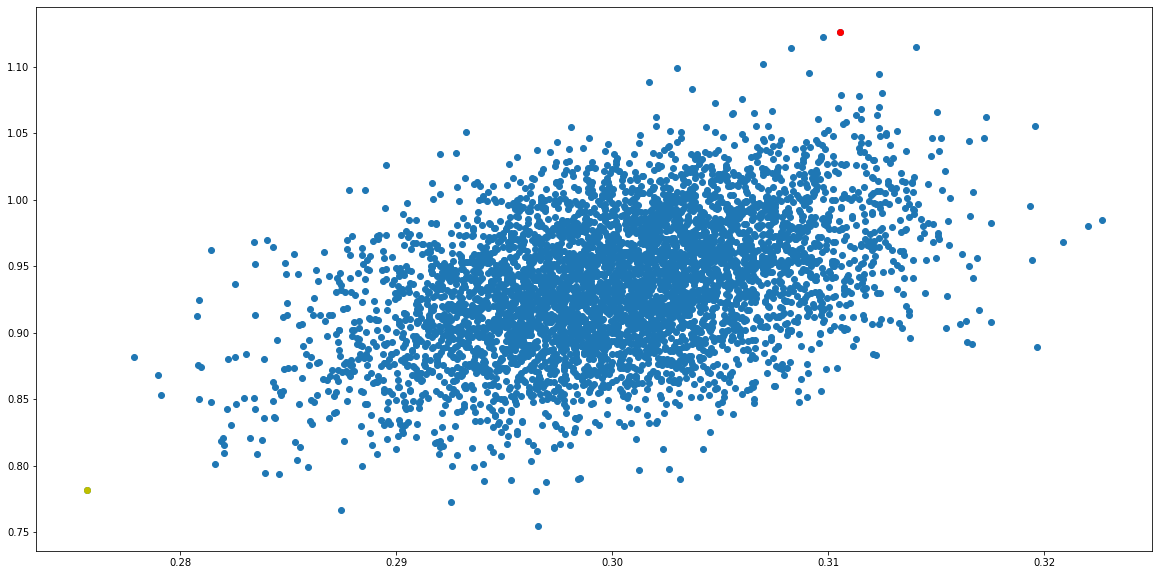

In [42]:
# Graph the 5000 potfolio returns
import matplotlib.pyplot as plt
plt.subplots(figsize = (20,10))
plt.scatter(portfolios['Volatility'], portfolios['Return'])
plt.scatter(min_var_port[1], min_var_port[0], color = 'y')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color = 'r')

In [64]:
# Capital Allocation Line

cal_x = []
cal_y = []
utility = []
a = 5

for er in np.linspace(rf, max(pfolio_returns), 100):
    sd = (er - rf) / ((optimal_risky_port[0] - rf) / optimal_risky_port[1])
    u = er - 0.5*a*(sd**2)
    cal_x.append(sd)
    cal_y.append(er)
    utility.append(u)

data2 = {'utility': utility, 'cal_y': cal_y, 'cal_x': cal_x}
cal = pd.DataFrame(data2)
cal.head()

,utility,cal_y,cal_x
0,0.023030,0.023030,0.000000
1,0.034150,0.034175,0.003137
2,0.045221,0.045320,0.006274
3,0.056243,0.056465,0.009411
4,0.067216,0.067609,0.012548


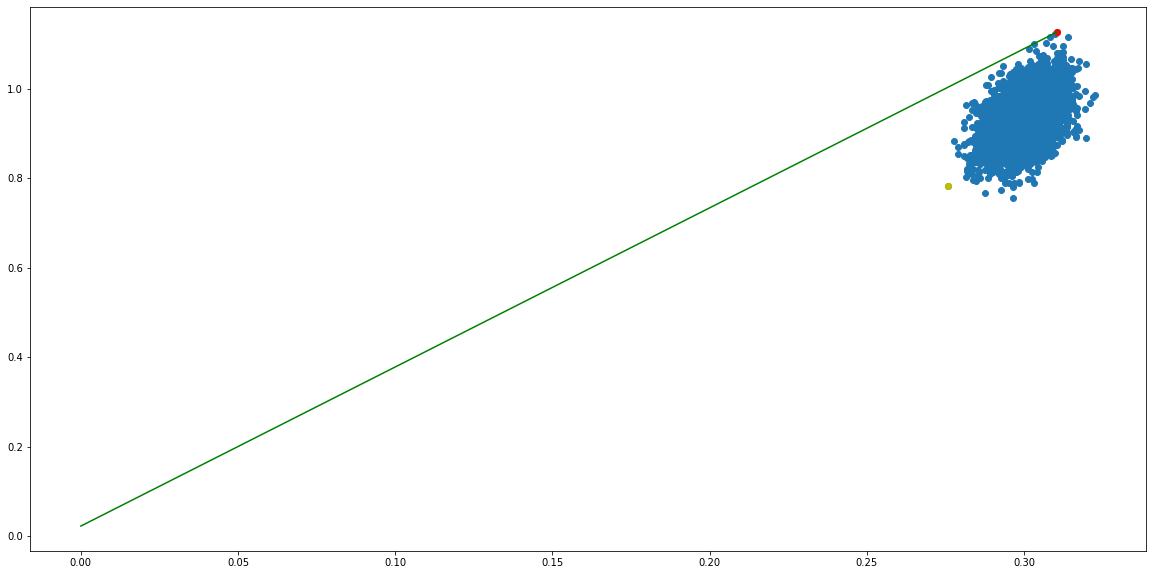

In [65]:
plt.subplots(figsize = (20, 10))
plt.scatter(portfolios['Volatility'], portfolios['Return'])
plt.scatter(min_var_port[1], min_var_port[0], color = 'y')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color = 'r')
plt.plot(cal_x, cal_y, color = 'g')

axes = plt.gca()
#axes.set_xlim([0, 2])
#axes.set_ylim([0.0, 5])

In [45]:
p_portfolios = portfolios.pivot_table(columns = ['Return', 'Volatility'])
p_portfolios.head()

Return,0.754753,0.767153,0.772823,0.781015,0.781706,0.788074,0.788579,0.789240,0.790008,0.790126,...,1.083282,1.088814,1.094853,1.095703,1.099525,1.102146,1.113997,1.115320,1.122470,1.126369
Volatility,0.296559,0.287445,0.292540,0.296491,0.275683,0.296929,0.294074,0.295330,0.298412,0.303129,...,0.303702,0.301707,0.312357,0.309127,0.303020,0.306970,0.308270,0.314092,0.309745,0.310572
ABT weight,0.018928,0.021158,0.005691,0.004611,0.013790,0.026828,0.020574,0.007594,0.002404,0.023860,...,0.021471,0.025028,0.001380,0.006113,0.002490,0.007875,0.012163,0.014496,0.001015,0.013996
AMZN weight,0.024023,0.022198,0.018855,0.020754,0.026621,0.020088,0.025510,0.021215,0.007448,0.021304,...,0.010962,0.003803,0.002460,0.015705,0.002388,0.019704,0.007663,0.007448,0.018414,0.000987
APPN weight,0.013217,0.003383,0.014227,0.005611,0.005143,0.018453,0.000681,0.008938,0.009688,0.008613,...,0.020172,0.006867,0.013295,0.012201,0.017471,0.028014,0.016364,0.029043,0.025398,0.004628
ARKK weight,0.013428,0.010957,0.003098,0.011763,0.001933,0.013726,0.024091,0.003502,0.022279,0.009215,...,0.022563,0.014973,0.022224,0.020788,0.026555,0.010380,0.022859,0.030678,0.024700,0.020173
BAC weight,0.023349,0.021768,0.011149,0.004107,0.011123,0.011991,0.016098,0.007708,0.009914,0.020684,...,0.011474,0.021642,0.010842,0.007577,0.009624,0.005618,0.025484,0.030912,0.003848,0.011807


In [54]:
# Show me the best portfolio

optimal_risky_port

Return          1.126369
Volatility      0.310572
BLK weight      0.004842
IWL weight      0.021959
VONE weight     0.018804
                  ...   
MORN weight     0.020717
JNJ weight      0.008130
UNH weight      0.006410
RHHBY weight    0.005490
ZTS weight      0.012869
Name: 825, Length: 76, dtype: float64

In [58]:
#Select some high return and somewhat low volatility, show their weights
risky_return = optimal_risky_port['Return']
risky_volatility = optimal_risky_port['Volatility']
cash =16939.97

final_output = portfolios.loc[(portfolios['Return'] >= risky_return) & (portfolios['Volatility'] <= risky_volatility)] * cash
final_output.transpose()

,825
Return,19080.664014
Volatility,5261.075556
BLK weight,82.023563
IWL weight,371.987257
VONE weight,318.537192
...,...
MORN weight,350.949928
JNJ weight,137.723974
UNH weight,108.583229
RHHBY weight,92.994776


In [59]:
# Display final output: How much cash should I invest in each stock? What is the expected volatility and return?

with pd.option_context("display.max_rows", 100):
    display(final_output.transpose()) 

,825
Return,19080.664014
Volatility,5261.075556
BLK weight,82.023563
IWL weight,371.987257
VONE weight,318.537192
NDAQ weight,400.276527
VOO weight,321.299827
DIA weight,310.342116
VYM weight,200.958715
EH weight,400.473207


In [ ]:
# Final portfolio is adjusted a bit to account for personal opinion :)